In [1]:
import sys
import warnings

import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, balanced_accuracy_score, accuracy_score
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from time import time
from sklearn.model_selection import train_test_split
from tqdm import tqdm

sys.path.append("../")
from utils import load_data, StrokeParams, FetalHealthParams

warnings.filterwarnings("ignore", category=ConvergenceWarning)

RANDOM_STATE = 666


def plot_training_validation_scores(clf, title, filename):
    plt.plot(clf.training_scores_, label="Training score", color="blue", marker="o")
    plt.plot(clf.validation_scores_, label="Validation score", color="orange")
    plt.xlabel("Epochs")
    plt.ylabel("Score")
    plt.title(title)
    plt.ylim(0, 1)
    plt.legend()
    plt.savefig(filename)
    plt.show()


@ignore_warnings(category=ConvergenceWarning)
def search(X, y, model, param_grid, scorer, cv=5):
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=scorer,
        cv=StratifiedKFold(n_splits=5),
        n_jobs=-1,
        verbose=1,
    )
    grid.fit(X, y)
    return grid


def get_files():
    data = set()

    for dataset in ["stroke", "fetal"]:
        for algo in ["pca", "ica", "rp", "umap"]:
            files = glob(f"../step_02_dim_red/{dataset}*_{algo}_*.csv")
            files = [file for file in files if os.path.exists(file)]
            train_data = [file for file in files if "test" not in file]

            for file in train_data:
                if "all" in file:
                    file_info = [dataset + "_all", algo, file]
                else:
                    file_info = [dataset, algo, file]

                test_file = file.replace(f"_{algo}", f"_test_{algo}")
                if test_file in files:
                    file_info.append(test_file)
                else:
                    file_info.append(None)

                data.add(tuple(file_info))

    return data


if __name__ == "__main__":
    dims = [32, 64, 128, 256, 512]

    dims_combinations = []

    for a in dims:
        for b in dims:
            dims_combinations.append((a, b))

    param_grid = {
        "hidden_layer_sizes": dims_combinations,
        # "dropout": [i / 100 for i in range(0, 50 + 5, 5)],
        "learning_rate_init": [1e-2, 1e-3, 1e-4],
    }

    balanced_scorer = make_scorer(balanced_accuracy_score)

    # Stroke
    stroke_network = MLPClassifier(
        random_state=RANDOM_STATE,
        activation="relu",
        solver="adam",
        max_iter=30,
        early_stopping=True,
    )
    stroke_grid = GridSearchCV(
        estimator=stroke_network,
        param_grid=param_grid,
        scoring=balanced_scorer,
        cv=StratifiedKFold(n_splits=5),
        n_jobs=-1,
        verbose=1,
    )

    # fetal
    fetal_network = MLPClassifier(
        random_state=RANDOM_STATE,
        activation="relu",
        solver="adam",
        max_iter=30,
        early_stopping=True,
    )
    fetal_grid = GridSearchCV(
        estimator=fetal_network,
        param_grid=param_grid,
        scoring=balanced_scorer,
        cv=StratifiedKFold(n_splits=5),
        n_jobs=-1,
        verbose=1,
    )

Dataset: stroke, Algorithm: Baseline
Dataset: fetal_health, Algorithm: Baseline
Fitting 5 folds for each of 75 candidates, totalling 375 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilaye

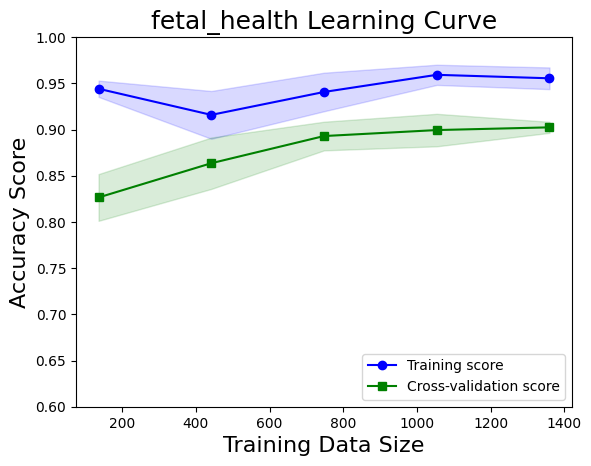

Training took 0.59 seconds.


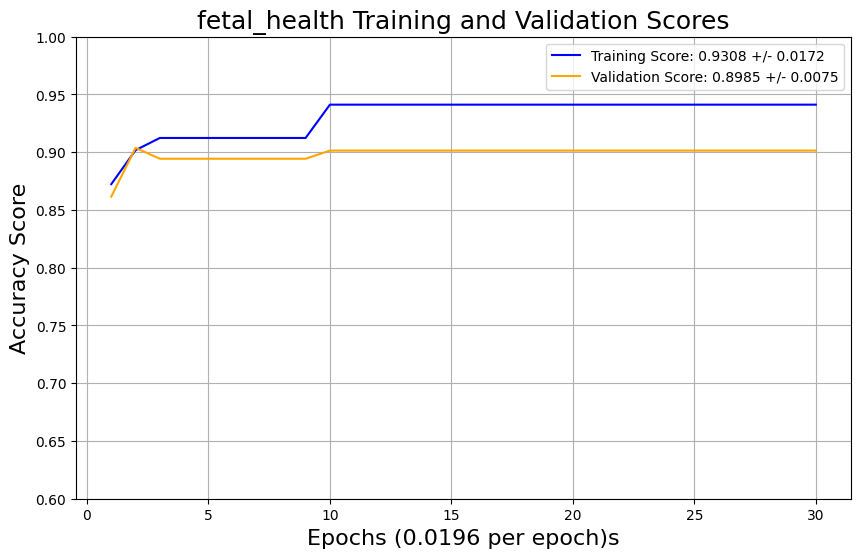

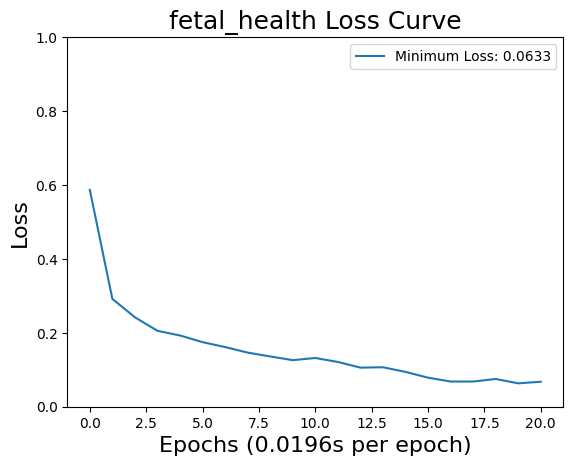

Dataset: stroke_all_pca_2, Algorithm: PCA
Dataset: fetal_health_pca_8, Algorithm: PCA
Fitting 5 folds for each of 75 candidates, totalling 375 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilaye

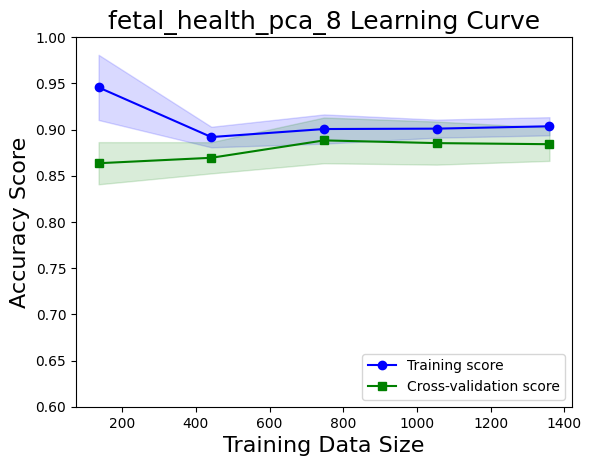

Training took 0.50 seconds.


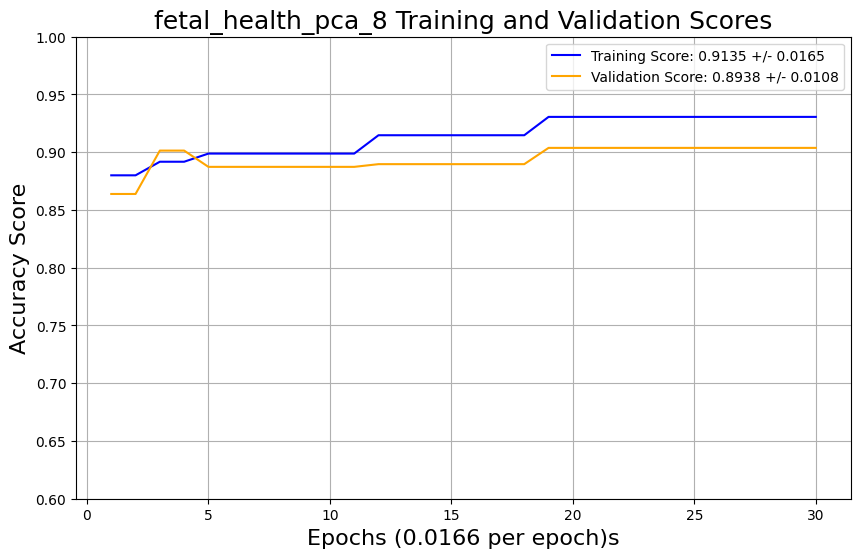

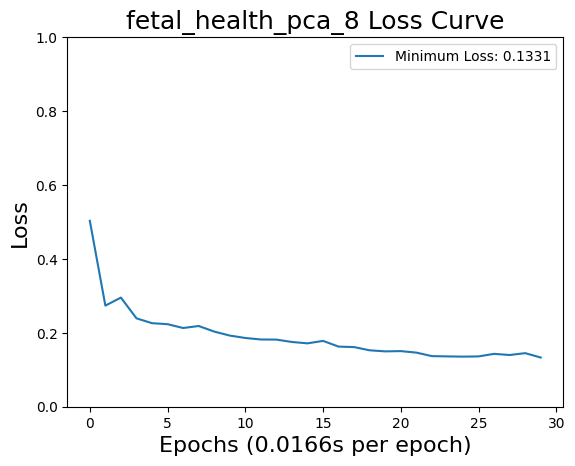

Dataset: stroke_rp_17, Algorithm: RP
Dataset: fetal_rp_17, Algorithm: RP
Fitting 5 folds for each of 75 candidates, totalling 375 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilaye

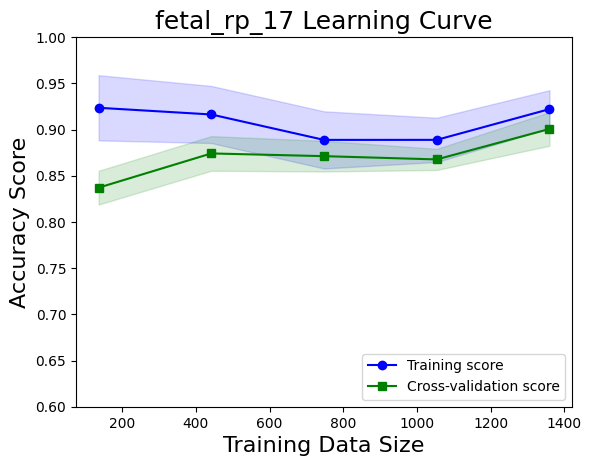

Training took 0.71 seconds.


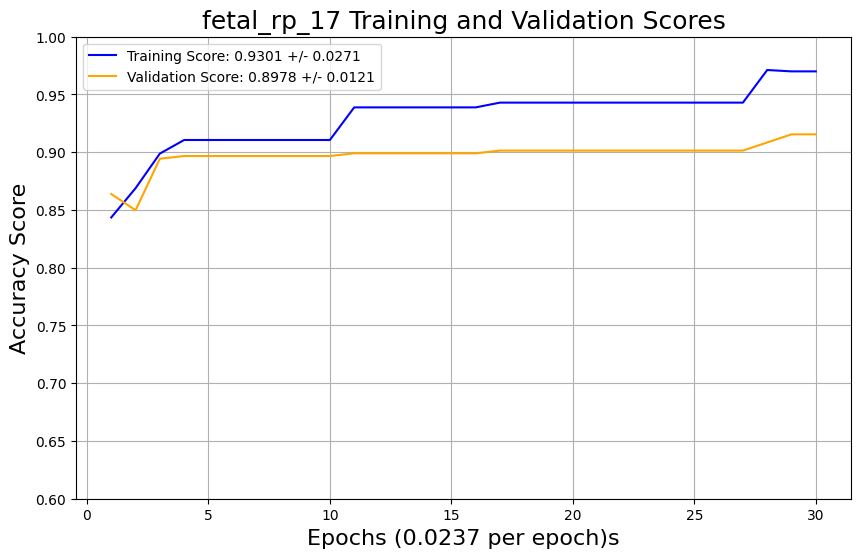

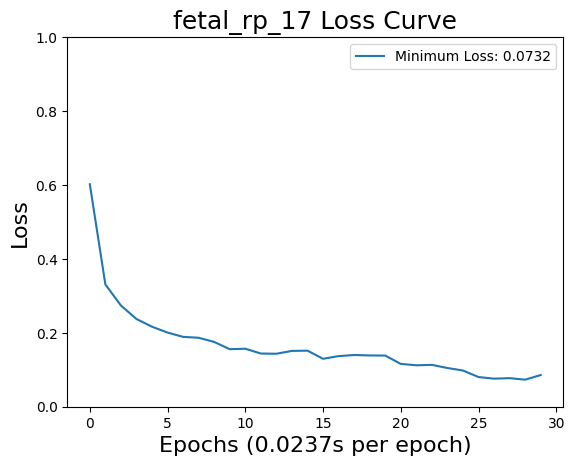

Dataset: stroke_umap_13, Algorithm: UMAP
Dataset: fetal_umap_4, Algorithm: UMAP
Fitting 5 folds for each of 75 candidates, totalling 375 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilaye

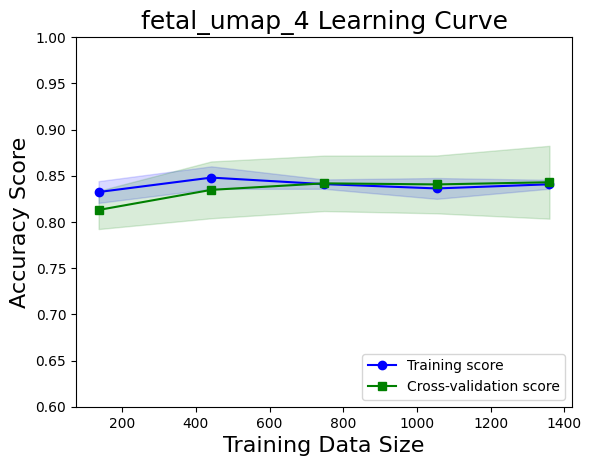

Training took 0.04 seconds.


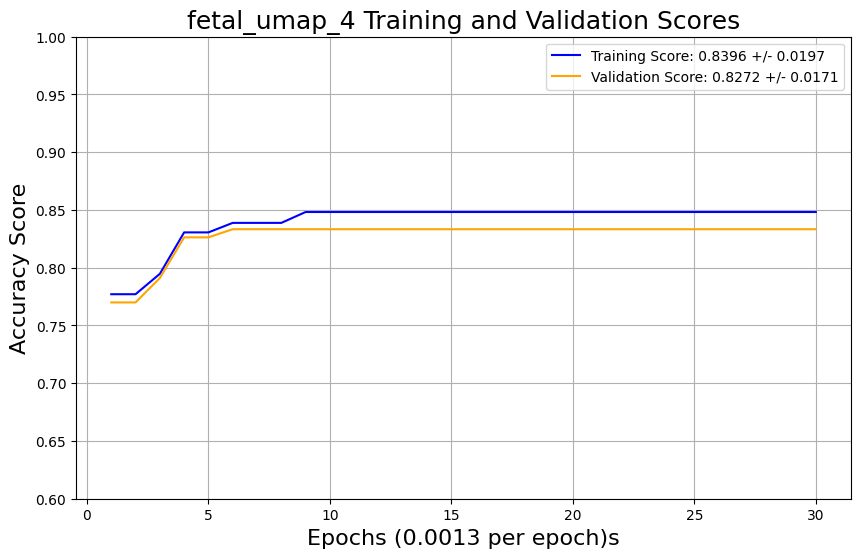

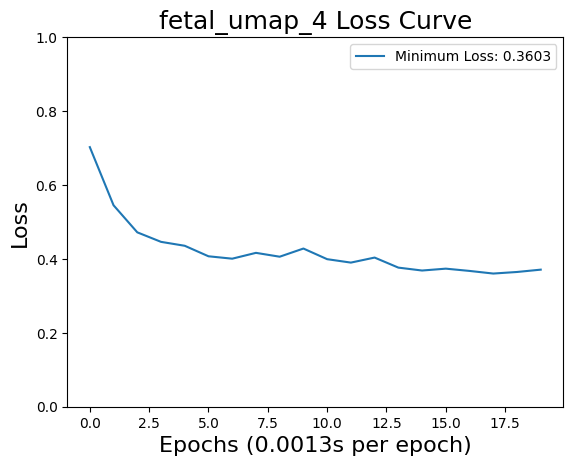

Dataset: stroke_all_gmm_2, Algorithm: GMM
Dataset: fetal_all_gmm_2, Algorithm: GMM
Fitting 5 folds for each of 75 candidates, totalling 375 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilaye

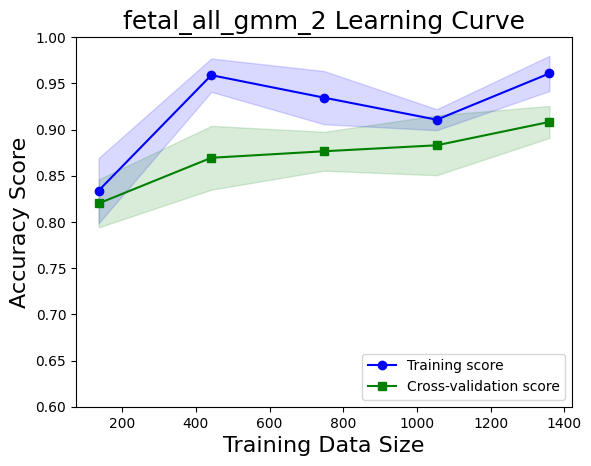

Training took 0.29 seconds.


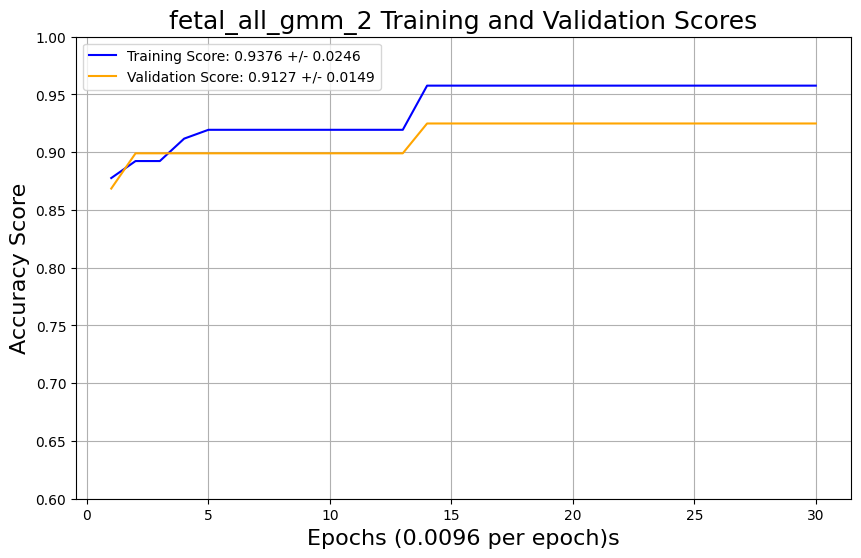

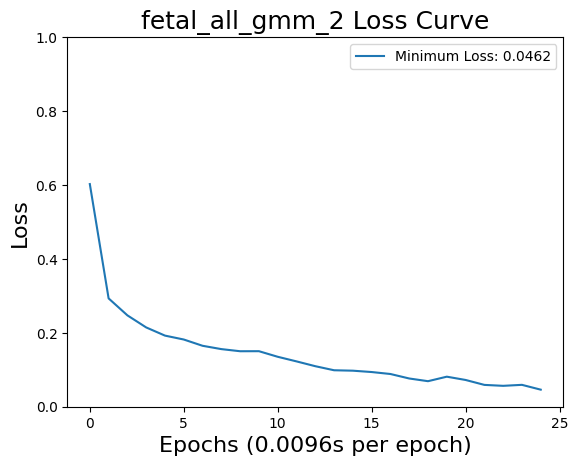

Dataset: stroke_gmm_2, Algorithm: GMM
Dataset: fetal_gmm_2, Algorithm: GMM
Fitting 5 folds for each of 75 candidates, totalling 375 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilaye

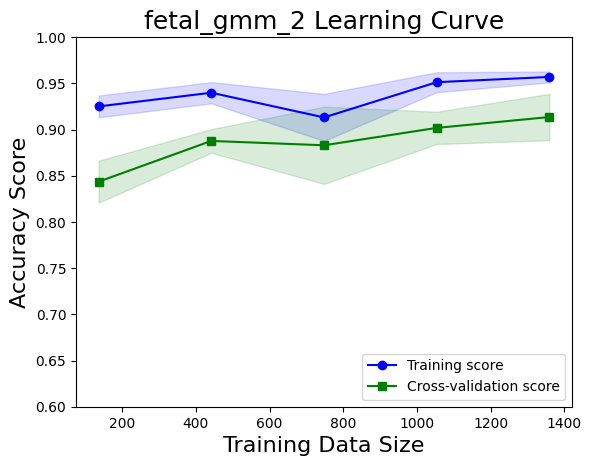

Training took 1.13 seconds.


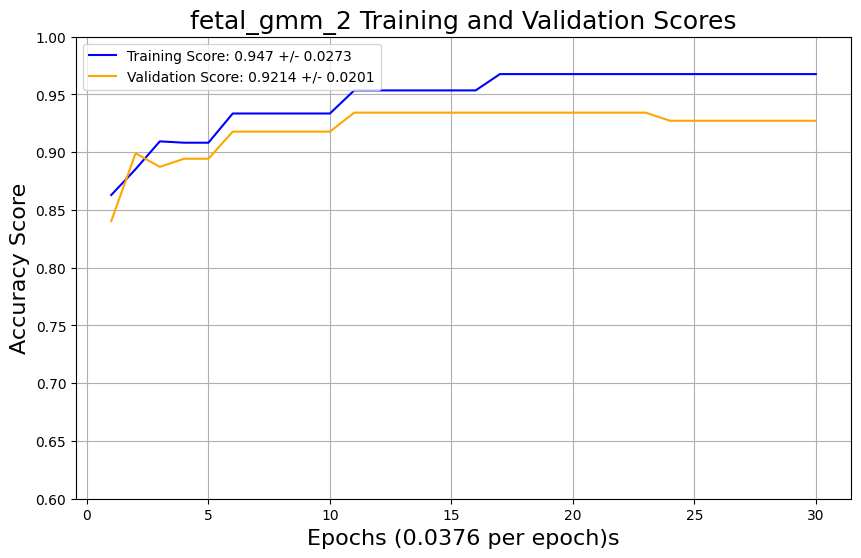

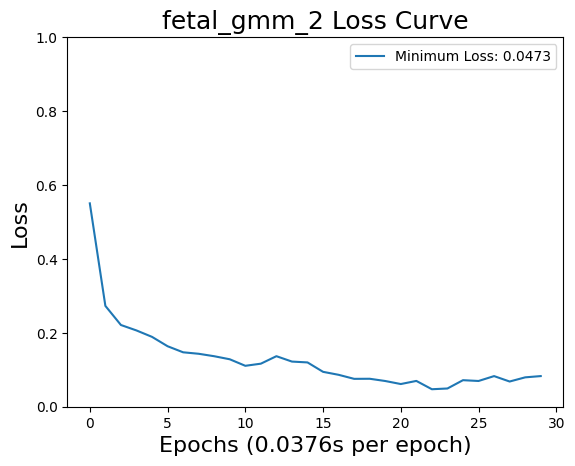

Dataset: stroke_all_kmeans_2, Algorithm: KMeans
Dataset: fetal_all_kmeans_2, Algorithm: KMeans
Fitting 5 folds for each of 75 candidates, totalling 375 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilaye

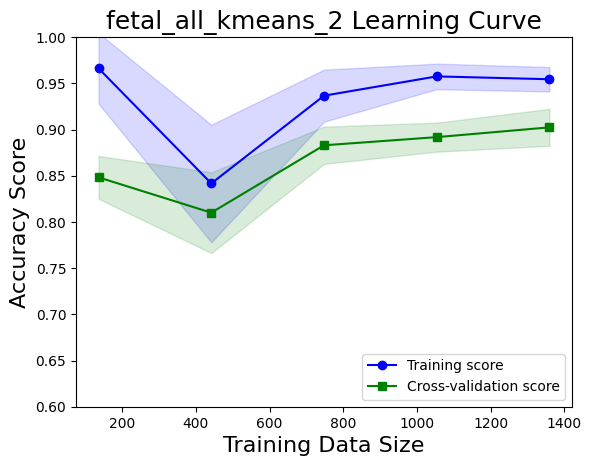

Training took 0.79 seconds.


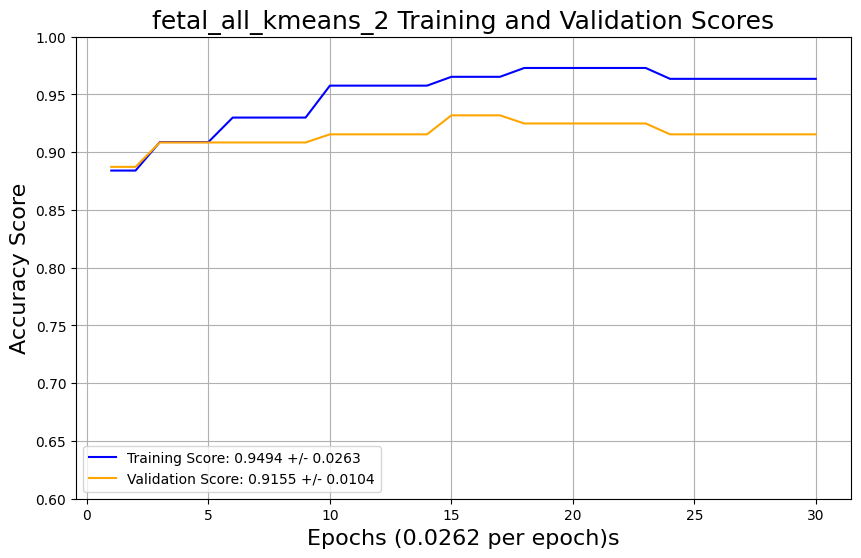

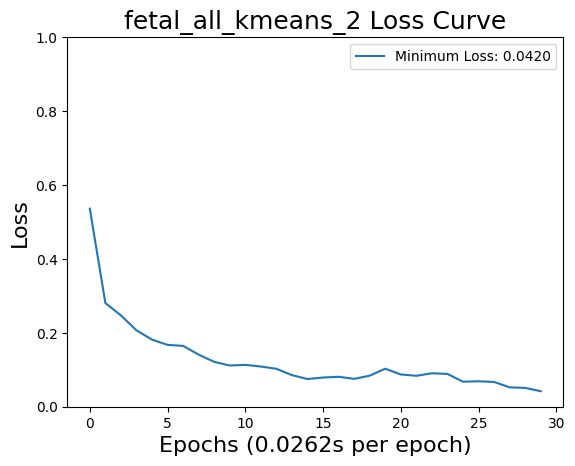

Dataset: stroke_kmeans_2, Algorithm: KMeans
Dataset: fetal_kmeans_2, Algorithm: KMeans
Fitting 5 folds for each of 75 candidates, totalling 375 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilaye

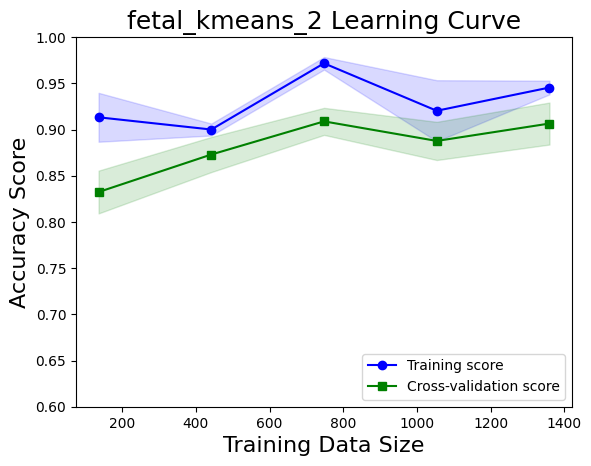

Training took 3.13 seconds.


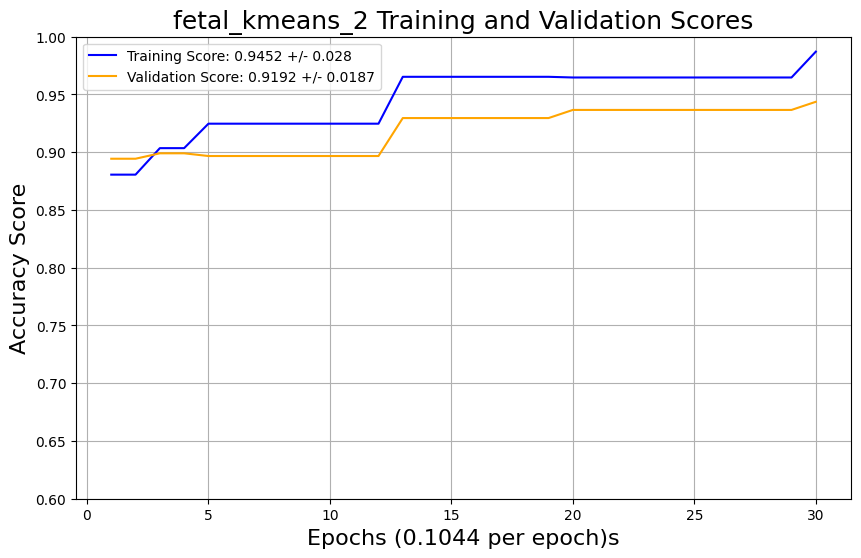

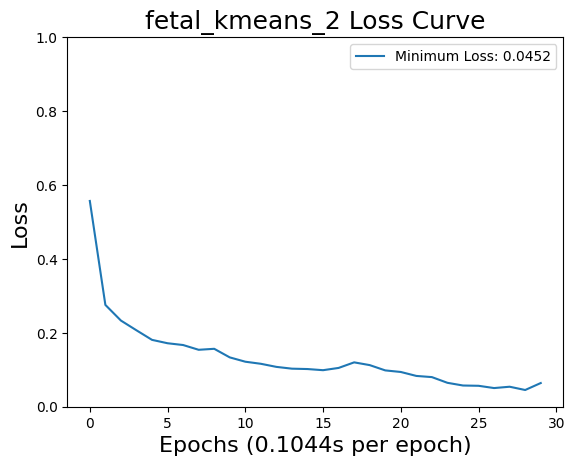

In [5]:
files = [
    (
        "stroke",
        "Baseline",
        StrokeParams.data_train,
        StrokeParams.data_test,
    ),
    (
        "fetal_health",
        "Baseline",
        FetalHealthParams.data_train,
        FetalHealthParams.data_test,
    ),
    (
        "stroke_all_pca_2",
        "PCA",
        "../step_02_dim_red/stroke_all_pca_2.csv",
        "../step_02_dim_red/stroke_all_test_pca_2.csv",
    ),
    (
        "fetal_health_pca_8",
        "PCA",
        "../step_02_dim_red/fetal_health_pca_8.csv",
        "../step_02_dim_red/fetal_health_test_pca_8.csv",
    ),
    # RP
    (
        "stroke_rp_17",
        "RP",
        "../step_02_dim_red/strokeX_rp_17.csv",
        "../step_02_dim_red/strokeX_rp_17.csv",
    ),
    (
        "fetal_rp_17",
        "RP",
        "../step_02_dim_red/fetalX_rp_17.csv",
        "../step_02_dim_red/fetalX_test_rp_17.csv",
    ),
    # UMAP
    (
        "stroke_umap_13",
        "UMAP",
        "../step_02_dim_red/strokeX_umap_13.csv",
        "../step_02_dim_red/strokeX_test_umap_13.csv",
    ),
    (
        "fetal_umap_4",
        "UMAP",
        "../step_02_dim_red/fetalX_umap_4.csv",
        "../step_02_dim_red/fetalX_test_umap_4.csv",
    ),
    # GMM
    (
        "stroke_all_gmm_2",
        "GMM",
        "../step_01_clustering/strokeX_all_gmm_2.csv",
        "../step_01_clustering/strokeX_test_all_gmm_2.csv",
    ),
    (
        "fetal_all_gmm_2",
        "GMM",
        "../step_01_clustering/fetalX_all_gmm_2.csv",
        "../step_01_clustering/fetalX_test_all_gmm_2.csv",
    ),
    (
        "stroke_gmm_2",
        "GMM",
        "../step_01_clustering/strokeX_gmm_2.csv",
        "../step_01_clustering/strokeX_test_gmm_2.csv",
    ),
    (
        "fetal_gmm_2",
        "GMM",
        "../step_01_clustering/fetalX_gmm_2.csv",
        "../step_01_clustering/fetalX_test_gmm_2.csv",
    ),
    # KMeans
    (
        "stroke_all_kmeans_2",
        "KMeans",
        "../step_01_clustering/strokeX_all_kmeans_2.csv",
        "../step_01_clustering/strokeX_test_all_kmeans_2.csv",
    ),
    (
        "fetal_all_kmeans_2",
        "KMeans",
        "../step_01_clustering/fetalX_all_kmeans_2.csv",
        "../step_01_clustering/fetalX_test_all_kmeans_2.csv",
    ),
    (
        "stroke_kmeans_2",
        "KMeans",
        "../step_01_clustering/strokeX_kmeans_2.csv",
        "../step_01_clustering/strokeX_test_kmeans_2.csv",
    ),
    (
        "fetal_kmeans_2",
        "KMeans",
        "../step_01_clustering/fetalX_kmeans_2.csv",
        "../step_01_clustering/fetalX_test_kmeans_2.csv",
    ),
]

fetal_grid_results = {}
stroke_grid_results = {}

if __name__ == "__main__":
    for label, algo, train_file, test_file in files:
        print(f"Dataset: {label}, Algorithm: {algo}")

        fetal_grid_results[label] = {}

        if label.lower().startswith("stroke"):
            target_column = StrokeParams.target_column
        else:
            target_column = FetalHealthParams.target_column

        X_train, y_train = load_data(train_file, target_column)
        X_test, y_test = load_data(test_file, target_column)

        # continue

        if label.lower().startswith("fetal"):
            grid = search(
                X_train,
                y_train,
                stroke_network,
                param_grid,
                balanced_scorer,
                cv=StratifiedKFold(n_splits=5),
            )

            fetal_grid_results[label]["model"] = grid

            mlp = MLPClassifier(
                random_state=RANDOM_STATE,
                activation="relu",
                solver="adam",
                max_iter=30,
                early_stopping=True,
                **grid.best_params_,
            )

            train_sizes, train_scores, test_scores = learning_curve(
                mlp,
                X_train,
                y_train,
                cv=5,
                n_jobs=-1,
                train_sizes=np.linspace(0.1, 1.0, 5),
            )

            fetal_grid_results[label]["train_sizes"] = train_sizes
            fetal_grid_results[label]["train_scores"] = train_scores
            fetal_grid_results[label]["test_scores"] = test_scores

            train_mean = np.mean(train_scores, axis=1)
            train_std = np.std(train_scores, axis=1)
            test_mean = np.mean(test_scores, axis=1)
            test_std = np.std(test_scores, axis=1)

            plt.plot(
                train_sizes,
                train_mean,
                label="Training score",
                color="blue",
                marker="o",
            )
            plt.fill_between(
                train_sizes,
                train_mean - train_std,
                train_mean + train_std,
                color="blue",
                alpha=0.15,
            )
            plt.plot(
                train_sizes,
                test_mean,
                label="Cross-validation score",
                color="green",
                marker="s",
            )
            plt.fill_between(
                train_sizes,
                test_mean - test_std,
                test_mean + test_std,
                color="green",
                alpha=0.15,
            )

            plt.title(f"{label} Learning Curve", fontsize=18)
            plt.xlabel("Training Data Size", fontsize=16)
            plt.ylabel("Accuracy Score", fontsize=16)
            plt.ylim(0.6, 1.0)
            plt.legend(loc="lower right")
            plt.savefig(
                f"mlp_fetal_{label.lower().replace(' ', '_')}_learning_curve.png"
            )
            plt.show()

            start_time = time()
            mlp.fit(X_train, y_train)
            runtime = time() - start_time
            fetal_grid_results[label]["runtime"] = runtime

            print(f"Training took {runtime:.2f} seconds.")

            train_scores = []
            val_scores = []
            # Simulate epochs
            for epochs in range(1, 30 + 1):  # Number of epochs
                mlp = MLPClassifier(
                    random_state=RANDOM_STATE,
                    activation="relu",
                    solver="adam",
                    max_iter=epochs,
                    early_stopping=True,
                    **grid.best_params_,
                )
                mlp.fit(X_train, y_train)

                # Evaluate on training and validation set
                train_pred = mlp.predict(X_train)
                val_pred = mlp.predict(X_test)

                train_scores.append(accuracy_score(y_train, train_pred))
                val_scores.append(accuracy_score(y_test, val_pred))

            # Plotting the training and validation scores
            plt.figure(figsize=(10, 6))
            epochs = range(1, len(train_scores) + 1)
            train_scores_mean, train_scores_std = np.mean(train_scores), np.std(
                train_scores
            )
            val_scores_mean, val_scores_std = np.mean(val_scores), np.std(val_scores)
            plt.plot(
                epochs,
                train_scores,
                label=f"Training Score: {np.round(train_scores_mean, 4)} +/- {np.round(train_scores_std, 4)}",
                color="blue",
            )
            plt.plot(
                epochs,
                val_scores,
                label=f"Validation Score: {np.round(val_scores_mean, 4)} +/- {np.round(val_scores_std, 4)}",
                color="orange",
            )
            plt.title(f"{label} Training and Validation Scores", fontsize=18)
            seconds_per_epoch = runtime / len(train_scores)
            plt.xlabel(
                f"Epochs ({np.round(seconds_per_epoch, 4)} per epoch)s", fontsize=16
            )
            plt.ylabel("Accuracy Score", fontsize=16)
            plt.legend()
            plt.ylim(0.6, 1.0)
            plt.grid(True)
            plt.savefig(
                f"mlp_fetal_{label.lower().replace(' ', '_')}_training_validation_scores.png"
            )
            plt.show()

            # Plotting the loss curve
            plt.plot(
                mlp.loss_curve_,
                label="Minimum Loss: {:.4f}".format(min(mlp.loss_curve_)),
            )
            plt.title(f"{label} Loss Curve", fontsize=18)
            plt.xlabel(
                f"Epochs ({np.round(seconds_per_epoch, 4)}s per epoch)", fontsize=16
            )
            plt.ylabel("Loss", fontsize=16)
            plt.ylim(0.0, 1.0)
            plt.legend()
            plt.savefig(f"mlp_fetal_{label.lower().replace(' ', '_')}_loss_curve.png")
            plt.show()

In [13]:
from sklearn.metrics import classification_report

if __name__ == "__main__":
    models = []
    train_bacc_scores = []
    test_bacc_scores = []
    evaluation_results = {}

    for label, algo, train_file, test_file in files:
        if label.lower().startswith("stroke"):
            continue
        else:
            model = fetal_grid_results[label]["model"]

            X_test, y_test = load_data(test_file, FetalHealthParams.target_column)

            y_pred = model.predict(X_test)

            report = classification_report(y_test, y_pred, output_dict=True)
            bacc = balanced_accuracy_score(y_test, y_pred)
            report["bacc"] = bacc

            X_train, y_train = load_data(train_file, FetalHealthParams.target_column)
            train_bacc = balanced_accuracy_score(
                y_train, model.predict(X_train)
            )
            models.append(label)
            train_bacc_scores.append(train_bacc)
            test_bacc_scores.append(bacc)

            evaluation_results[label] = report

            for k, v in report.items():
                print(f"{label} {k} {v}")
            print()

fetal_health 0.0 {'precision': 0.9447674418604651, 'recall': 0.975975975975976, 'f1-score': 0.9601181683899557, 'support': 333.0}
fetal_health 1.0 {'precision': 0.8372093023255814, 'recall': 0.5538461538461539, 'f1-score': 0.6666666666666667, 'support': 65.0}
fetal_health 2.0 {'precision': 0.5897435897435898, 'recall': 0.8214285714285714, 'f1-score': 0.6865671641791046, 'support': 28.0}
fetal_health accuracy 0.9014084507042254
fetal_health macro avg {'precision': 0.7905734446432121, 'recall': 0.7837502337502338, 'f1-score': 0.7711173330785757, 'support': 426.0}
fetal_health weighted avg {'precision': 0.9050210875669441, 'recall': 0.9014084507042254, 'f1-score': 0.8973628263009472, 'support': 426.0}
fetal_health bacc 0.7837502337502338

fetal_health_pca_8 0.0 {'precision': 0.9636363636363636, 'recall': 0.954954954954955, 'f1-score': 0.9592760180995475, 'support': 333.0}
fetal_health_pca_8 1.0 {'precision': 0.7272727272727273, 'recall': 0.7384615384615385, 'f1-score': 0.732824427480916, 

In [15]:
df = pd.DataFrame(
    {
        "Model": models,
        "Training BACC": train_bacc_scores,
        "Test BACC": test_bacc_scores,
    }
)

display(df)

,Model,Training BACC,Test BACC
0,fetal_health,0.880154,0.783750
1,fetal_health_pca_8,0.860417,0.790663
2,fetal_rp_17,0.936044,0.825423
3,fetal_umap_4,0.599004,0.589381
4,fetal_all_gmm_2,0.941099,0.847414
5,fetal_gmm_2,0.966146,0.855498
6,fetal_all_kmeans_2,0.938832,0.821602
7,fetal_kmeans_2,0.970087,0.867804


In [8]:
# return dictionary key with max value
max_key = max(bacc_scores, key=bacc_scores.get)
print(f"Best model: {max_key}. BACC: {bacc_scores[max_key]}")

Best model: fetal_kmeans_2. BACC: 0.8678035178035177


In [9]:
bacc_scores

{'fetal_health': 0.7837502337502338,
 'fetal_health_pca_8': 0.7906626406626408,
 'fetal_rp_17': 0.8254232254232255,
 'fetal_umap_4': 0.5893805893805893,
 'fetal_all_gmm_2': 0.8474138974138974,
 'fetal_gmm_2': 0.8554978054978055,
 'fetal_all_kmeans_2': 0.8216023716023716,
 'fetal_kmeans_2': 0.8678035178035177}

In [10]:
from sklearn.metrics import classification_report

evaluation_results = {}

for X_train, y_train, X_test, y_test, label in fetal_health_data:
    model = fetal_grid_results[label]["model"]
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    report["bacc"] = balanced_accuracy_score(y_test, y_pred)
    evaluation_results[label] = report

    for k, v in report.items():
        print(f"{label} {k} {v}")
    print()

baseline 0.0 {'precision': 0.9940119760479041, 'recall': 0.9567723342939481, 'f1-score': 0.97503671071953, 'support': 347.0}
baseline 1.0 {'precision': 0.9447674418604651, 'recall': 0.9908536585365854, 'f1-score': 0.9672619047619048, 'support': 328.0}
baseline 2.0 {'precision': 0.9936507936507937, 'recall': 0.9842767295597484, 'f1-score': 0.9889415481832543, 'support': 318.0}
baseline accuracy 0.9768378650553877
baseline macro avg {'precision': 0.9774767371863877, 'recall': 0.9773009074634272, 'f1-score': 0.9770800545548964, 'support': 993.0}
baseline weighted avg {'precision': 0.9776302406845999, 'recall': 0.9768378650553877, 'f1-score': 0.9769215062475898, 'support': 993.0}
baseline bacc 0.9773009074634272

PCA 0.0 {'precision': 0.9642857142857143, 'recall': 0.9337175792507204, 'f1-score': 0.9487554904831624, 'support': 347.0}
PCA 1.0 {'precision': 0.9255952380952381, 'recall': 0.948170731707317, 'f1-score': 0.9367469879518072, 'support': 328.0}
PCA 2.0 {'precision': 0.97507788161993

In [11]:
for X_train, y_train, X_test, y_test, label in fetal_health_data:
    params = fetal_grid_results[label]["model"].best_params_
    print(f"{label} best params: {params}")
    print()

baseline best params: {'hidden_layer_sizes': (64, 256), 'learning_rate_init': 0.01}

PCA best params: {'hidden_layer_sizes': (256, 256), 'learning_rate_init': 0.01}

KMeans best params: {'hidden_layer_sizes': (512, 512), 'learning_rate_init': 0.001}

GMM best params: {'hidden_layer_sizes': (128, 32), 'learning_rate_init': 0.01}

Random Projection 9 best params: {'hidden_layer_sizes': (128, 128), 'learning_rate_init': 0.01}

Random Projection 14 best params: {'hidden_layer_sizes': (512, 512), 'learning_rate_init': 0.01}

Random Projection 19 best params: {'hidden_layer_sizes': (32, 512), 'learning_rate_init': 0.01}

UMAP best params: {'hidden_layer_sizes': (64, 512), 'learning_rate_init': 0.001}

